# Cyber Security Attack Type Detection

-Abir Lakhal  
-Katy Mayoro Fall (DE)  
-Amina Hocine (DA)  
-Amina Gulzar (DA)    
-Nathalie Colard (DS)   
-Sehomi ESSENOUWA (DA)   
Instructor: Hanna Abi Akl

## Importing the libraries and dataset


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from user_agents import parse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from sklearn.feature_selection import mutual_info_classif


pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('cybersecurity_attacks.csv')

In [47]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

## Exploratory Data Analysis

In [74]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0),Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0),Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.0),Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; rv:1.9.6.20) Gecko/2583-02-14 13:30:10 Firefox/11.0,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQuia illo fugit eligendi doloremque. In doloremque autem iure.,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/3.0),Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accusantium soluta. Beatae maiores temporibus ratione fuga nostrum. Quas corrupti impedit officiis.,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Adira Madan,"Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac OS X) AppleWebKit/532.0 (KHTML, like Gecko) FxiOS/17.7p9211.0 Mobile/25F435 Safari/532.0",Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commodi.\nAccusantium voluptatum perferendis dolorem nulla ullam sint nisi. Laborum quos quibusdam deserunt quam fuga quas.,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Rati Dara,"Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4.90) AppleWebKit/532.40.6 (KHTML, like Gecko) Version/4.1 Safari/532.40.6",Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligendi tempore esse. Dolorem tenetur ipsam necessitatibus cum minima earum sequi.\nFacere quam ducimus hic. Tempore 

In [4]:
df.shape

(40000, 25)

In [9]:
df["Attack Type"].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

We will analyze each of the columns individually to see if they are related to the type of attack.

In [5]:
df['Source IP Address'].nunique()

40000

In [6]:
df['Destination IP Address'].nunique()

40000

In [13]:
df['Payload Data']

0        Qui natus odio asperiores nam. Optio nobis ius...
1        Aperiam quos modi officiis veritatis rem. Omni...
2        Perferendis sapiente vitae soluta. Hic delectu...
3        Totam maxime beatae expedita explicabo porro l...
4        Odit nesciunt dolorem nisi iste iusto. Animi v...
                               ...                        
39995    Quibusdam ullam consequatur consequuntur accus...
39996    Quaerat neque esse. Animi expedita natus commo...
39997    Enim at aspernatur illum. Saepe numquam eligen...
39998    Officiis dolorem sed harum provident earum dis...
39999    Eligendi omnis voluptate nihil voluptatibus do...
Name: Payload Data, Length: 40000, dtype: object

In [11]:
df['Payload Data'].nunique()

40000

In [14]:
df['User Information'].nunique()

32389

Source IP Address, Destination IP Address, Payload Data, User Information: This information does not seem to provide any clues for predicting the type of attacks since there are as many unique values as there are observations.  

We will analyze Source Port and Destination Port

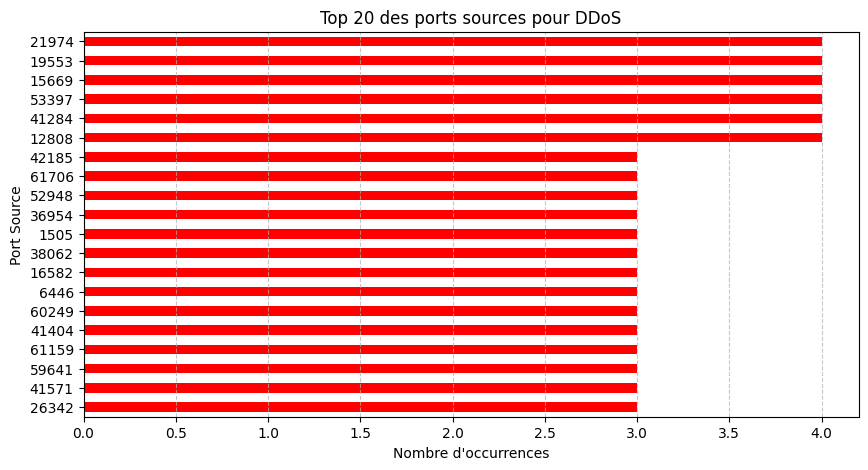

In [32]:

attack_type = "DDoS" #Malware, Intrusion  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Source Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports sources pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Port Source")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


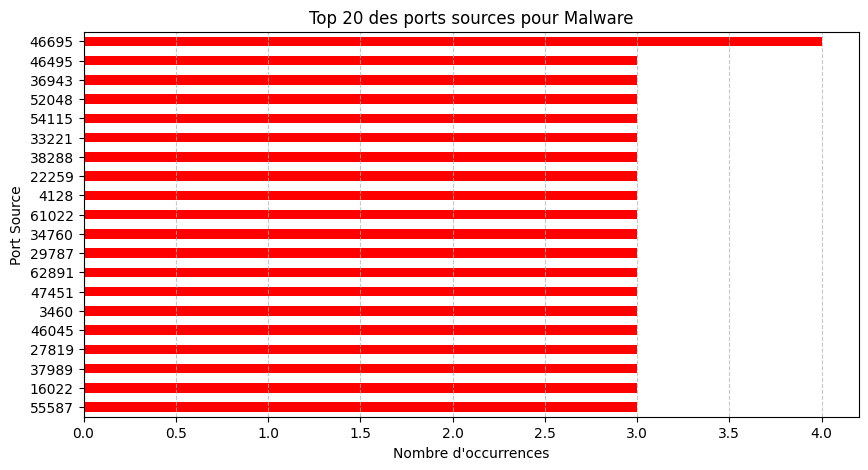

In [34]:

attack_type = "Malware" #DDoS, Intrusion  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Source Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports sources pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Port Source")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


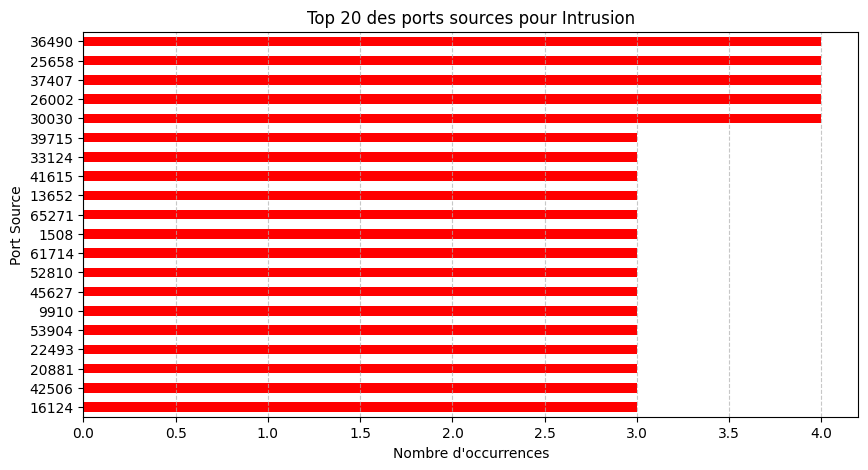

In [35]:

attack_type = "Intrusion" #DDoS, Malware  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Source Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports sources pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Port Source")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


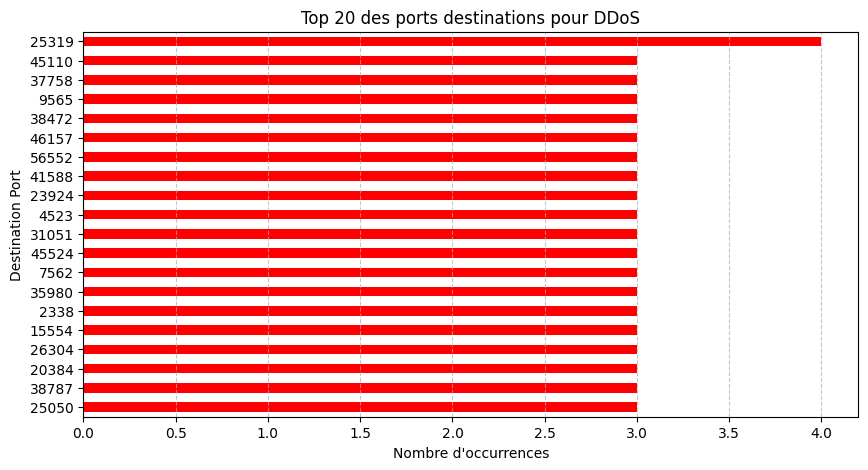

In [39]:

attack_type = "DDoS" #DDoS, Malware  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Destination Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports destinations pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Destination Port")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


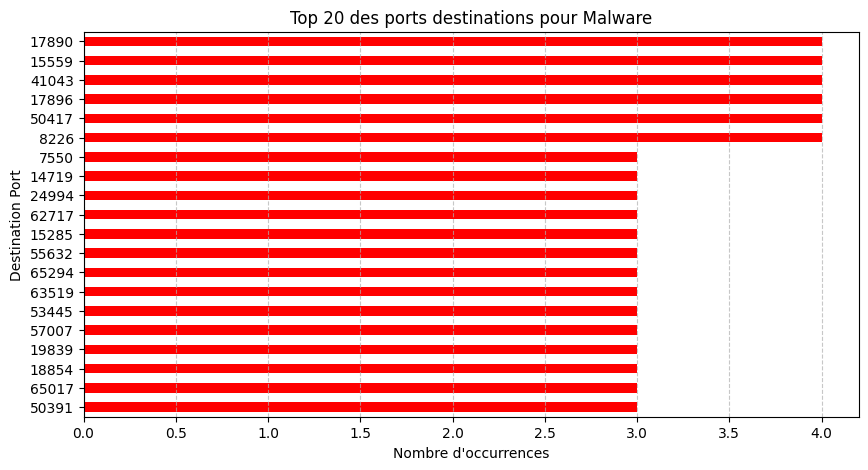

In [40]:

attack_type = "Malware" #DDoS, Malware  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Destination Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports destinations pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Destination Port")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


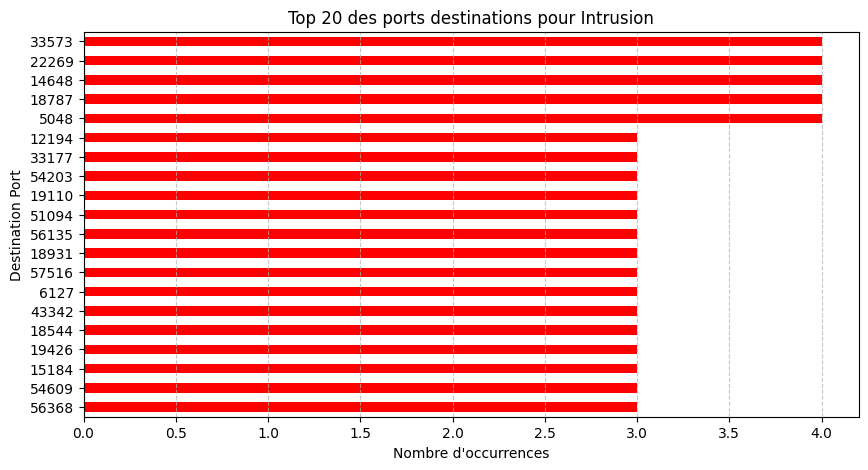

In [38]:

attack_type = "Intrusion" #DDoS, Malware  

df_filtered = df[df['Attack Type'] == attack_type]

port_counts = df_filtered['Destination Port'].value_counts()

# Sélectionner uniquement les 20 ports les plus fréquents
top_ports = port_counts.head(20)

plt.figure(figsize=(10, 5))
top_ports.plot(kind='barh', color='red')

plt.title(f"Top 20 des ports destinations pour {attack_type}")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Destination Port")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


For Source Port and Destination Port: There are no ports that are predominant for each attack.  

We will now analyze Anomaly Scores and Packet Length  

In [32]:
mean_scores = df.groupby("Attack Type")["Anomaly Scores"].mean()
print(mean_scores) 


Attack Type
DDoS         50.235063
Intrusion    49.978029
Malware      50.125794
Name: Anomaly Scores, dtype: float64


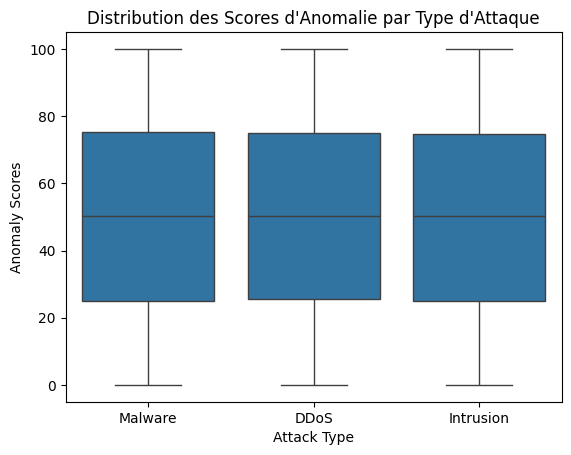

In [31]:

sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df)
plt.title("Distribution des Scores d'Anomalie par Type d'Attaque")
plt.show()


In [33]:
mean_scores = df.groupby("Attack Type")["Packet Length"].mean()
print(mean_scores) 


Attack Type
DDoS         785.348749
Intrusion    780.924387
Malware      778.047945
Name: Packet Length, dtype: float64


Anomaly Scores and Packet Length won't help to determine the Attack Type since their average seems similar for each type of attack.   


Next, we will analyze the categorical columns: Protocol, Packet Type, Traffic Type,  Attack Signature, Action Taken, Severity Level, Network Segment, Log Source 

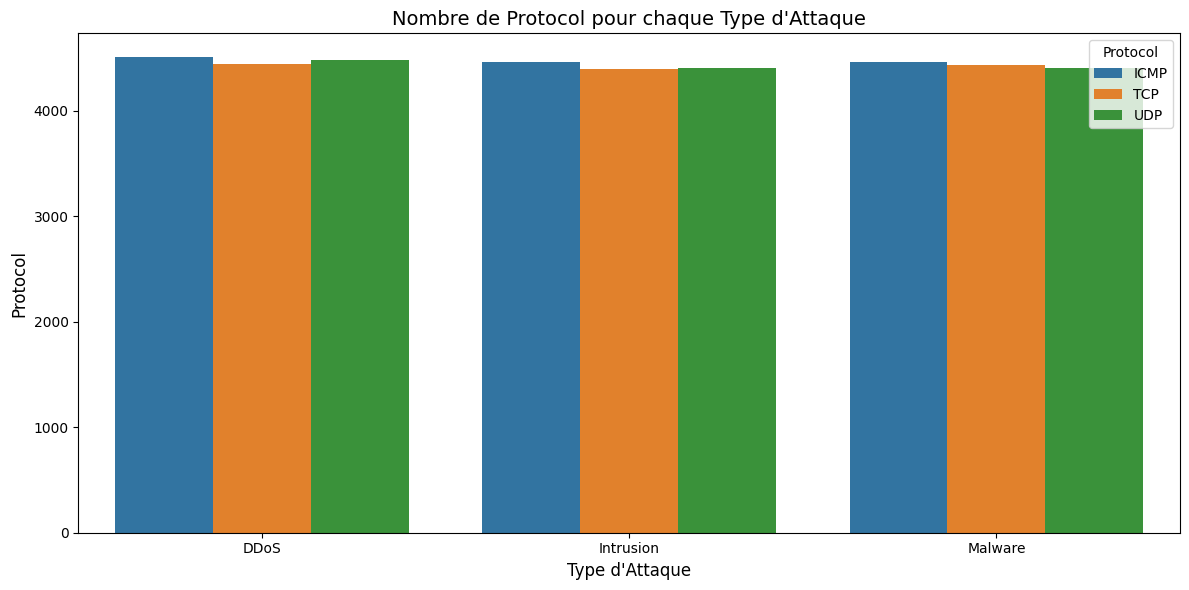

In [45]:


Protocol_counts = df.groupby(["Attack Type", "Protocol"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Protocol_counts, x="Attack Type", y="Count", hue="Protocol")

plt.title("Nombre de Protocol pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Protocol", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Protocol", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


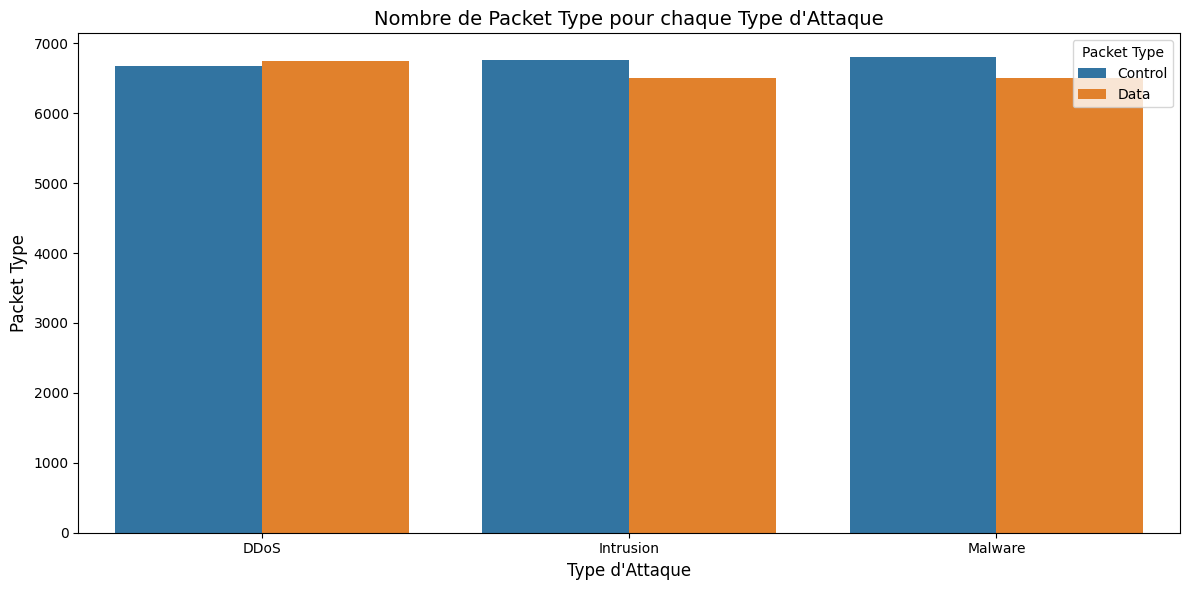

In [15]:
Protocol_counts = df.groupby(["Attack Type", "Packet Type"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Protocol_counts, x="Attack Type", y="Count", hue="Packet Type")

plt.title("Nombre de Packet Type pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Packet Type", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Packet Type", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


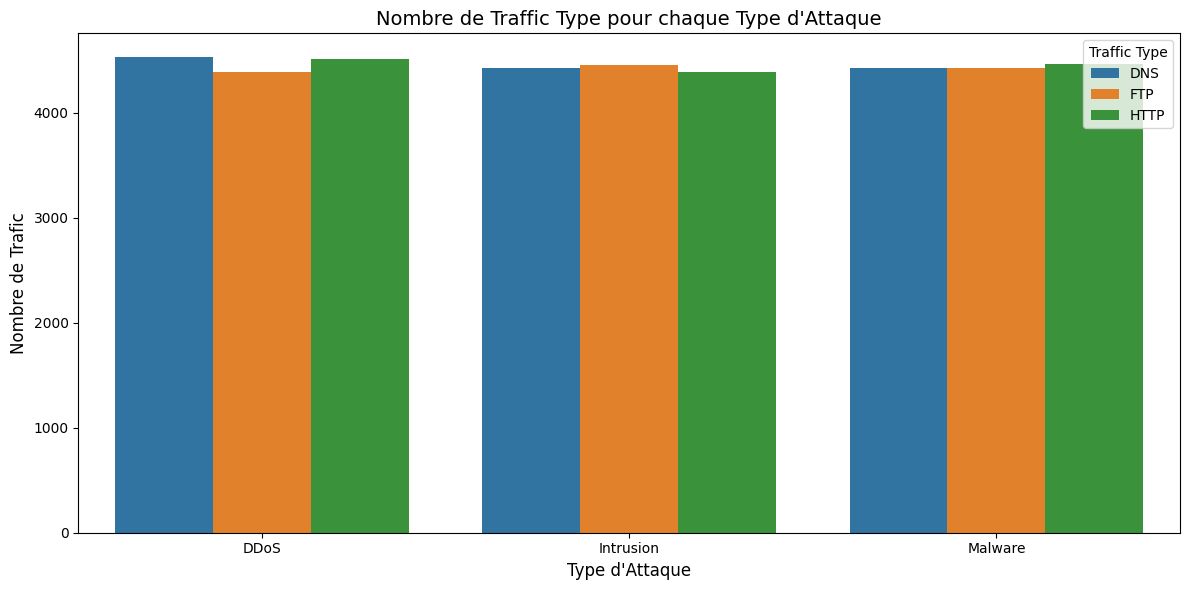

In [47]:


traffic_type_counts = df.groupby(["Attack Type", "Traffic Type"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_type_counts, x="Attack Type", y="Count", hue="Traffic Type")

plt.title("Nombre de Traffic Type pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Nombre de Trafic", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Traffic Type", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


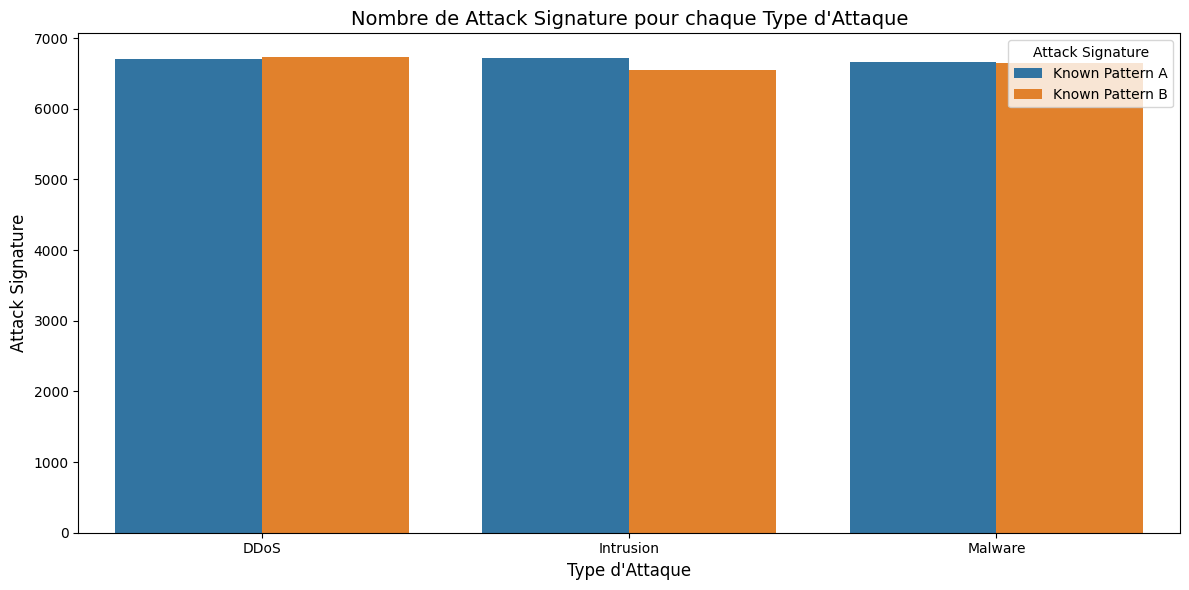

In [40]:


Attack_Signature_counts = df.groupby(["Attack Type", "Attack Signature"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Attack_Signature_counts, x="Attack Type", y="Count", hue="Attack Signature")

plt.title("Nombre de Attack Signature pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Attack Signature", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Attack Signature", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


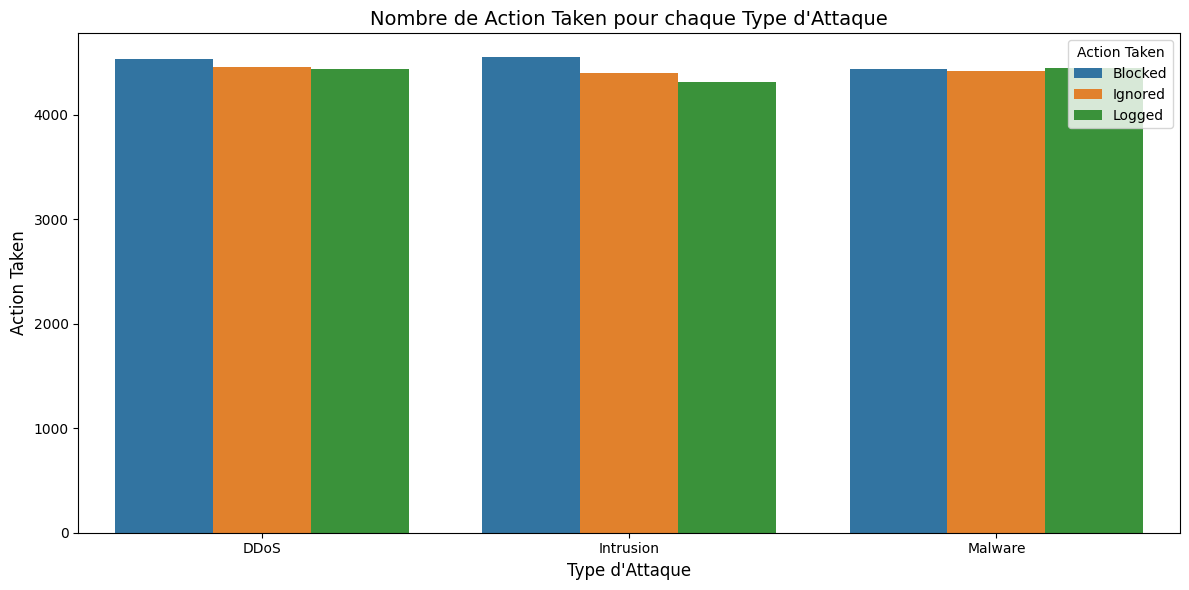

In [16]:


Protocol_counts = df.groupby(["Attack Type", "Action Taken"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Protocol_counts, x="Attack Type", y="Count", hue="Action Taken")

plt.title("Nombre de Action Taken pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Action Taken", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Action Taken", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


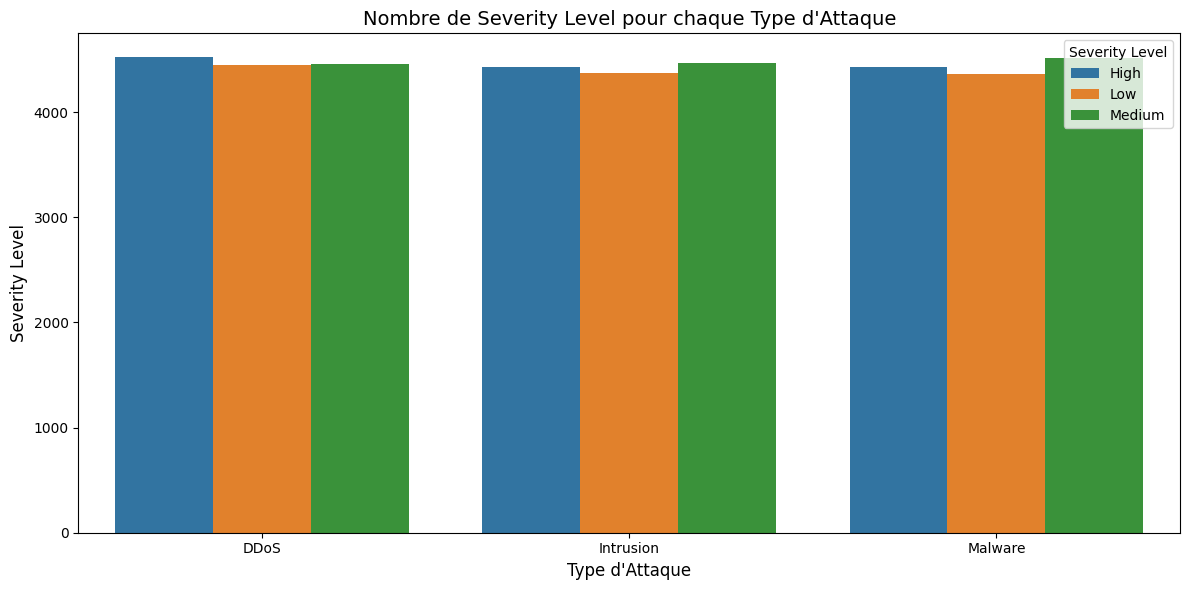

In [19]:


Severity_Level_counts = df.groupby(["Attack Type", "Severity Level"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Severity_Level_counts, x="Attack Type", y="Count", hue="Severity Level")

plt.title("Nombre de Severity Level pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Severity Level", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Severity Level", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


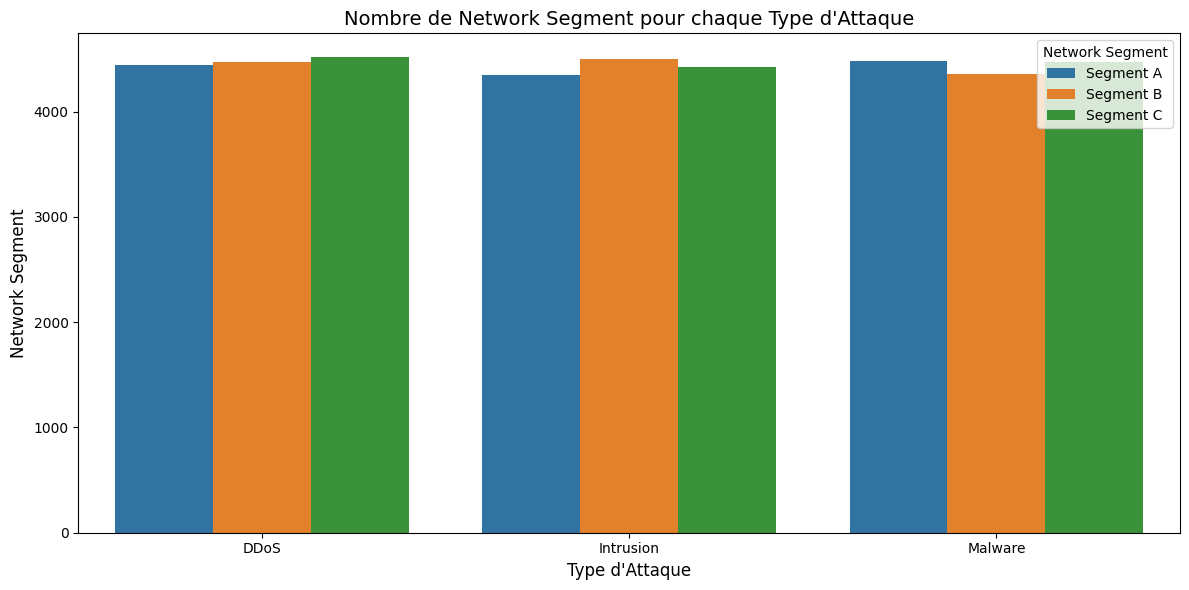

In [39]:


Network_Segment_counts = df.groupby(["Attack Type", "Network Segment"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Network_Segment_counts, x="Attack Type", y="Count", hue="Network Segment")

plt.title("Nombre de Network Segment pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Network Segment", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Network Segment", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


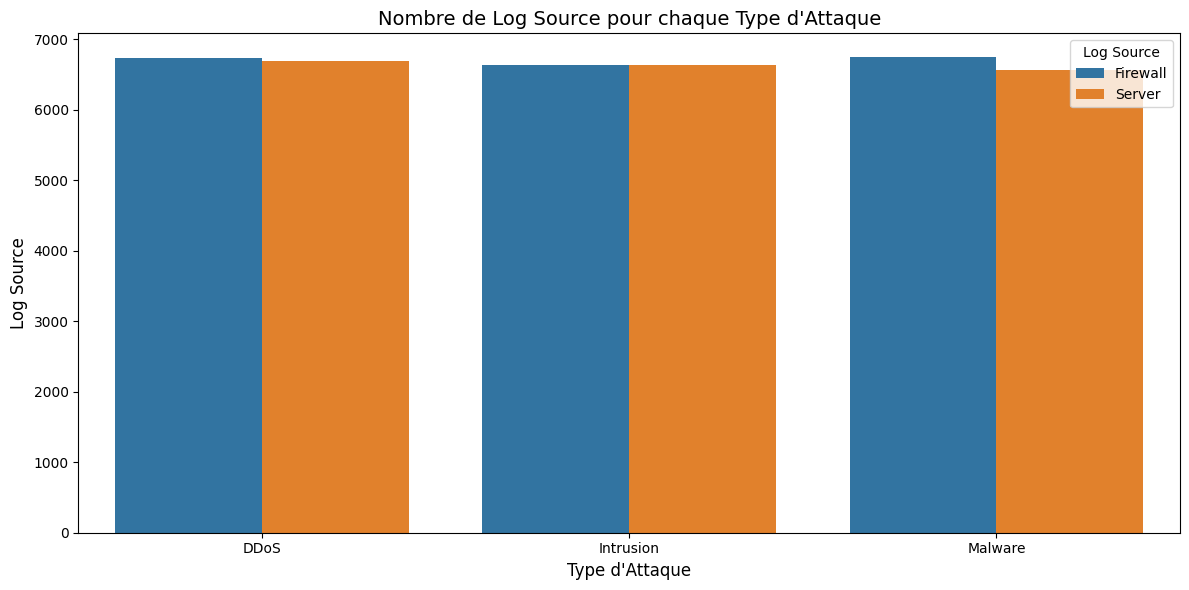

In [43]:


Log_Source_counts = df.groupby(["Attack Type", "Log Source"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=Log_Source_counts, x="Attack Type", y="Count", hue="Log Source")

plt.title("Nombre de Log Source pour chaque Type d'Attaque", fontsize=14)
plt.ylabel("Log Source", fontsize=12)
plt.xlabel("Type d'Attaque", fontsize=12)
plt.legend(title="Log Source", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


For the categorical columns Protocol, Packet Type, Traffic Type, Attack Signature, Action Taken, Severity Level, Network Segment and Log Source the values are evenly distributed across the three types of attacks. There do not appear to be any standout values that could help predict one type of attack over another.  


We will then analyze the columns: Malware Indicators, Alerts/Warnings,Firewall Logs, IDS/IPS Alerts

In [43]:
MalwareIndicators_counts = df.groupby(["Attack Type", "Malware Indicators"]).size().reset_index(name="Count")
MalwareIndicators_counts

,Attack Type,Malware Indicators,Count
0,DDoS,IoC Detected,6654
1,Intrusion,IoC Detected,6665
2,Malware,IoC Detected,6681


In [41]:
AlertsWarnings_counts = df.groupby(["Attack Type", "Alerts/Warnings"]).size().reset_index(name="Count")
AlertsWarnings_counts

,Attack Type,Alerts/Warnings,Count
0,DDoS,Alert Triggered,6673
1,Intrusion,Alert Triggered,6525
2,Malware,Alert Triggered,6735


In [35]:
Firewall_Logs_counts = df.groupby(["Attack Type", "Firewall Logs"]).size().reset_index(name="Count")
Firewall_Logs_counts

,Attack Type,Firewall Logs,Count
0,DDoS,Log Data,6712
1,Intrusion,Log Data,6623
2,Malware,Log Data,6704


In [20]:
IDSIPS_Alerts_counts = df.groupby(["Attack Type", "IDS/IPS Alerts"]).size().reset_index(name="Count")
IDSIPS_Alerts_counts

,Attack Type,IDS/IPS Alerts,Count
0,DDoS,Alert Data,6697
1,Intrusion,Alert Data,6587
2,Malware,Alert Data,6666


 Malware Indicators, Alerts/Warnings,Firewall Logs, IDS/IPS Alerts: the values are evenly distributed across the three types of attacks. There do not appear to be any standout values that could help predict one type of attack over another.  
 
 
We will then analyze the Timestamp


In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

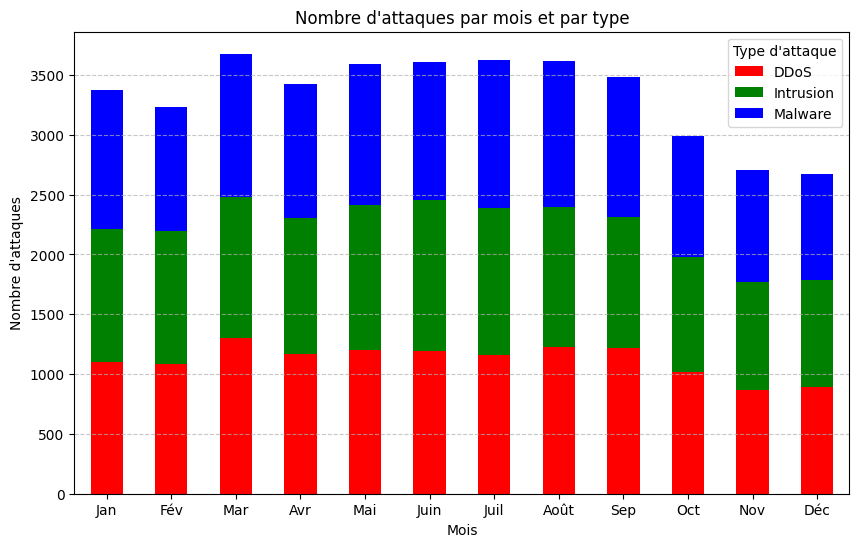

In [21]:
# Compter le nombre d’attaques par type et par mois

df['Month'] = df['Timestamp'].dt.month

attack_counts = df.groupby(['Month', 'Attack Type']).size().unstack(fill_value=0)

colors = {'DDoS': 'red', 'Malware': 'blue', 'Intrusion': 'green'}

attack_counts.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title("Nombre d'attaques par mois et par type")
plt.xlabel("Mois")
plt.ylabel("Nombre d'attaques")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
    'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'
], rotation=0)
plt.legend(title="Type d'attaque")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

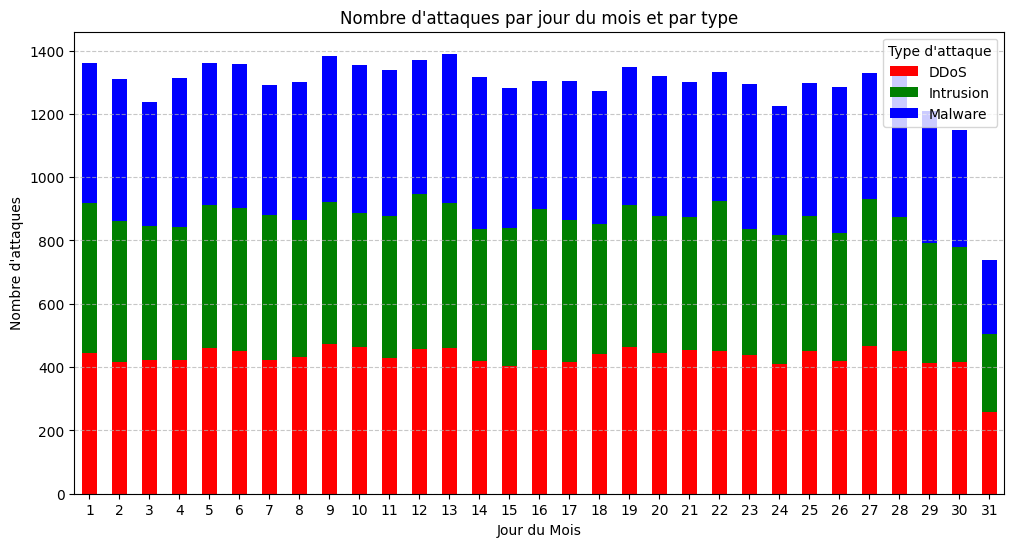

In [22]:
# Compter le nombre d’attaques par type et par jour

df['Day'] = df['Timestamp'].dt.day

attack_counts_day = df.groupby(['Day', 'Attack Type']).size().unstack(fill_value=0)

colors = {'DDoS': 'red', 'Malware': 'blue', 'Intrusion': 'green'}

attack_counts_day.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

plt.title("Nombre d'attaques par jour du mois et par type")
plt.xlabel("Jour du Mois")
plt.ylabel("Nombre d'attaques")
plt.xticks(range(0, 31), labels=[str(i+1) for i in range(31)], rotation=0)
plt.legend(title="Type d'attaque")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


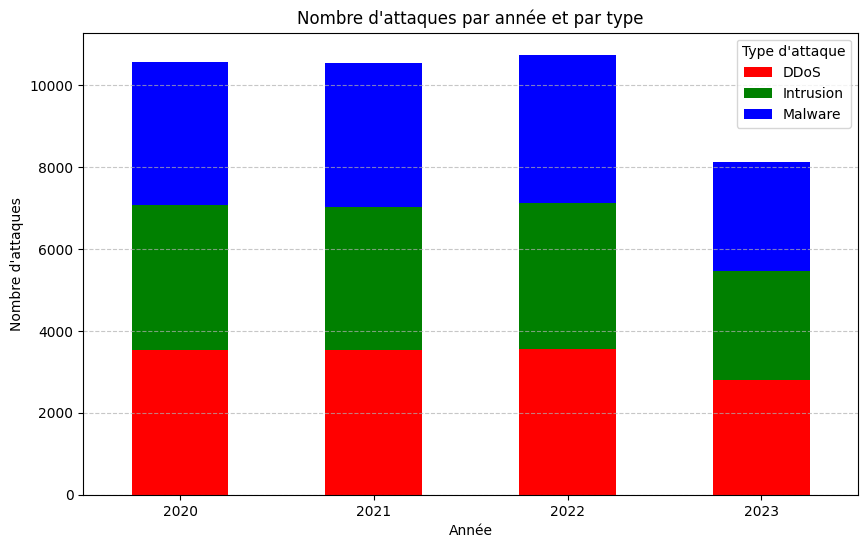

In [23]:

# Extraire l’année
df['Year'] = df['Timestamp'].dt.year

attack_counts_year = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

colors = {'DDoS': 'red', 'Malware': 'blue', 'Intrusion': 'green'}

attack_counts_year.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title("Nombre d'attaques par année et par type")
plt.xlabel("Année")
plt.ylabel("Nombre d'attaques")
plt.xticks(rotation=0)
plt.legend(title="Type d'attaque")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Timestamp: uniform information  

We will now analyze the geolocation column


In [41]:
def top_locations_per_attack(df):
    top_locations = {}

    for attack_type in df['Attack Type'].unique():
        top_5 = (
            df[df['Attack Type'] == attack_type]['Geo-location Data']
            .value_counts()
            .head(5)
        )
        top_locations[attack_type] = top_5

    return top_locations


In [42]:
top_locations = top_locations_per_attack(df)
for attack, locations in top_locations.items():
    print(f"\nTop 5 localisations pour {attack}:")
    print(locations)



Top 5 localisations pour Malware:
Geo-location Data
Aligarh, Chhattisgarh             9
Aurangabad, Nagaland              9
Yamunanagar, Arunachal Pradesh    8
Jalgaon, Mizoram                  8
Tenali, Madhya Pradesh            7
Name: count, dtype: int64

Top 5 localisations pour DDoS:
Geo-location Data
Raichur, Sikkim              7
Solapur, Karnataka           7
Hospet, Karnataka            7
Pimpri-Chinchwad, Manipur    7
Junagadh, Telangana          7
Name: count, dtype: int64

Top 5 localisations pour Intrusion:
Geo-location Data
Ghaziabad, Jharkhand       10
Amroha, Sikkim              8
Panvel, Jharkhand           8
Srikakulam, Uttarakhand     8
Rampur, Gujarat             8
Name: count, dtype: int64


In [43]:
df['State'] = df['Geo-location Data'].str.split(',').str[1].str.strip()


In [44]:
def top_locations_states_per_attack(df):
    top_locations = {}

    for attack_type in df['Attack Type'].unique():
        top_5 = (
            df[df['Attack Type'] == attack_type]['State']
            .value_counts()
            .head(10)
        )
        top_locations[attack_type] = top_5

    return top_locations


In [45]:
top_locations_states = top_locations_states_per_attack(df)
for attack, locations in top_locations_states.items():
    print(f"\nTop 10 localisations States pour {attack}:")
    print(locations)



Top 10 localisations States pour Malware:
State
Gujarat          508
Sikkim           498
Uttar Pradesh    498
West Bengal      498
Maharashtra      495
Bihar            493
Haryana          491
Assam            488
Punjab           485
Mizoram          483
Name: count, dtype: int64

Top 10 localisations States pour DDoS:
State
Manipur              522
Karnataka            520
Arunachal Pradesh    502
Maharashtra          499
Rajasthan            497
Bihar                497
Meghalaya            495
Himachal Pradesh     493
Odisha               491
Uttar Pradesh        490
Name: count, dtype: int64

Top 10 localisations States pour Intrusion:
State
Jharkhand            526
Uttarakhand          520
Manipur              500
Arunachal Pradesh    499
Nagaland             497
Uttar Pradesh        497
Gujarat              495
Rajasthan            486
Maharashtra          480
Mizoram              480
Name: count, dtype: int64


Many states are in the Top of other types of attacks (example: Maharashtra, Uttar Pradesh ..)   

We will now analyze the Device Information column, for this we use the user_agents library to parse the column information


In [3]:

# Fonction pour parser chaque User-Agent et extraire les informations souhaitées
def parse_user_agent(user_agent):
    ua = parse(user_agent)
    
    os_family = ua.os.family
    os_version = ua.os.version
    device_family = ua.device.family
    device_brand = ua.device.brand if ua.device.brand else "Unknown"
    device_model = ua.device.model if ua.device.model else "Unknown"
    browser_family = ua.browser.family
    #browser_version = ua.browser.version
    
    return os_family, os_version, device_family, device_brand, device_model, browser_family

df[['Operating System', 'OS Version', 'Device', 'Device Brand', 'Device Model', 'Browser']] = df['Device Information'].apply(lambda x: pd.Series(parse_user_agent(x)))


In [4]:
df[['Operating System', 'OS Version', 'Device', 'Device Brand', 'Device Model', 'Browser']]

,Operating System,OS Version,Device,Device Brand,Device Model,Browser
0,Windows,"(8,)",Other,Unknown,Unknown,IE
1,Windows,"(Vista,)",Other,Unknown,Unknown,IE
2,Windows,"(8,)",Other,Unknown,Unknown,IE
3,Mac OS X,"(10, 11, 5)",Mac,Apple,Mac,Firefox
4,Windows,"(8,)",Other,Unknown,Unknown,IE
...,...,...,...,...,...,...
39995,iOS,"(14, 2, 1)",iPad,Apple,iPad,Firefox iOS
39996,Windows,"(ME,)",Other,Unknown,Unknown,Safari
39997,Windows,"(NT,)",Other,Unknown,Unknown,Safari
39998,Linux,(),Other,Unknown,Unknown,Chrome


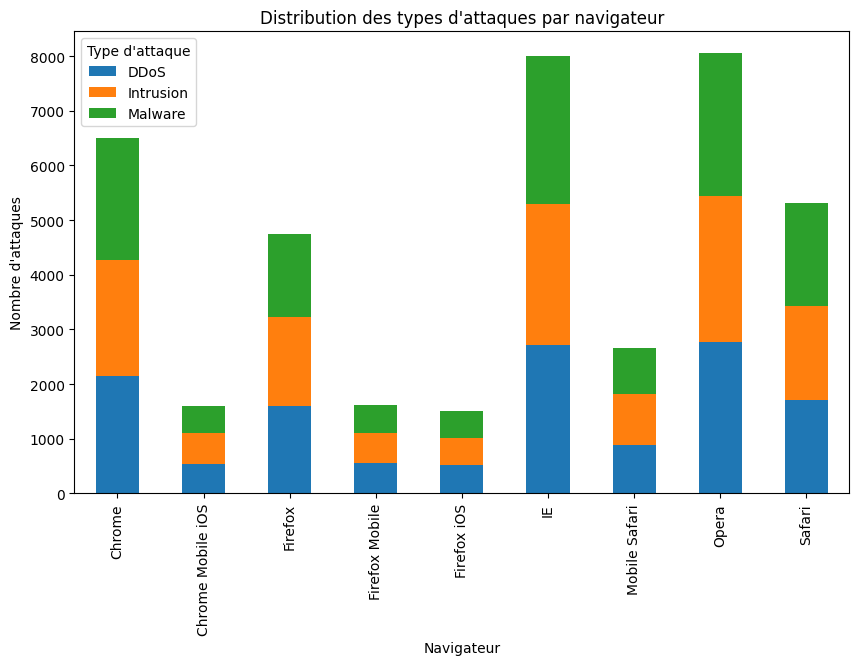

In [62]:

# Compter le nombre de chaque type d'attaque pour chaque navigateur
attack_by_browser = df.groupby(['Browser', 'Attack Type']).size().unstack().fillna(0)

attack_by_browser.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribution des types d'attaques par navigateur")
plt.ylabel("Nombre d'attaques")
plt.xlabel("Navigateur")
plt.legend(title="Type d'attaque")
plt.xticks(rotation=90)
plt.show()


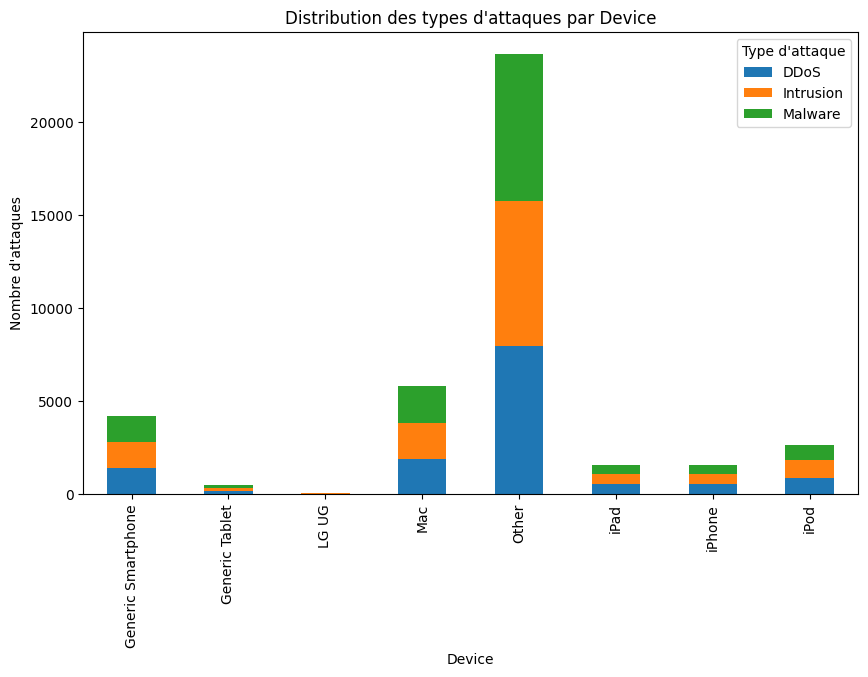

In [63]:

# Compter le nombre de chaque type d'attaque pour chaque Device
attack_by_browser = df.groupby(['Device', 'Attack Type']).size().unstack().fillna(0)

attack_by_browser.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribution des types d'attaques par Device")
plt.ylabel("Nombre d'attaques")
plt.xlabel("Device")
plt.legend(title="Type d'attaque")
plt.xticks(rotation=90)
plt.show()


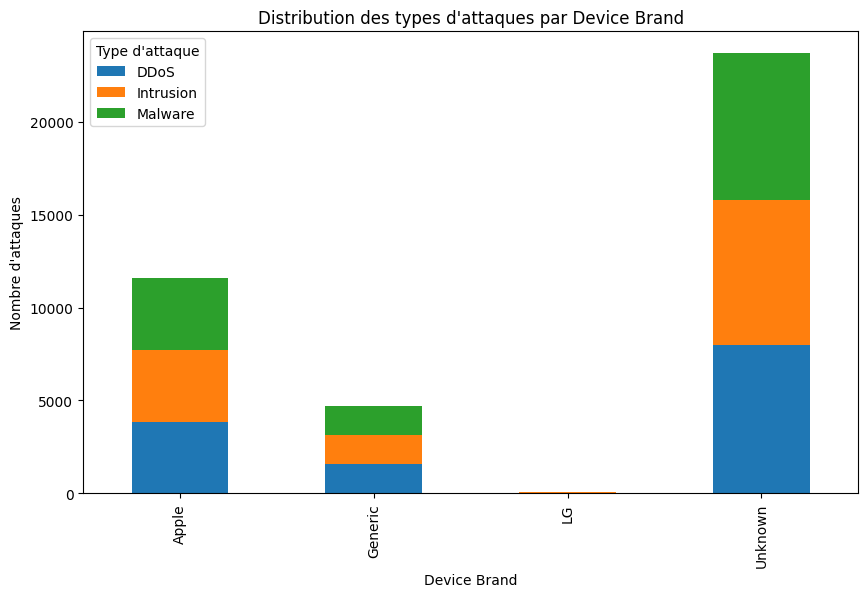

In [64]:

# Compter le nombre de chaque type d'attaque pour chaque Device Brand
attack_by_browser = df.groupby(['Device Brand', 'Attack Type']).size().unstack().fillna(0)

attack_by_browser.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribution des types d'attaques par Device Brand")
plt.ylabel("Nombre d'attaques")
plt.xlabel("Device Brand")
plt.legend(title="Type d'attaque")
plt.xticks(rotation=90)
plt.show()


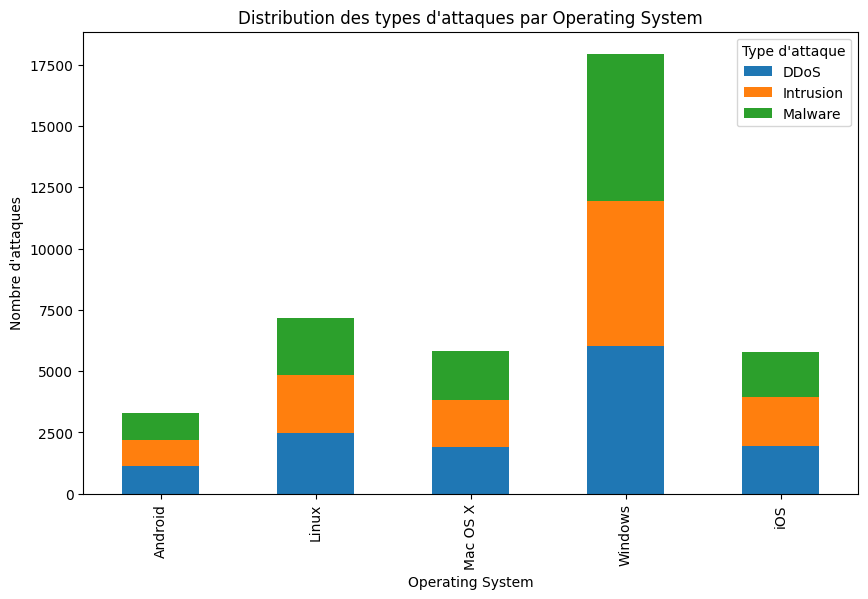

In [65]:

# Compter le nombre de chaque type d'attaque pour chaque Operating System
attack_by_browser = df.groupby(['Operating System', 'Attack Type']).size().unstack().fillna(0)

attack_by_browser.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribution des types d'attaques par Operating System")
plt.ylabel("Nombre d'attaques")
plt.xlabel("Operating System")
plt.legend(title="Type d'attaque")
plt.xticks(rotation=90)
plt.show()


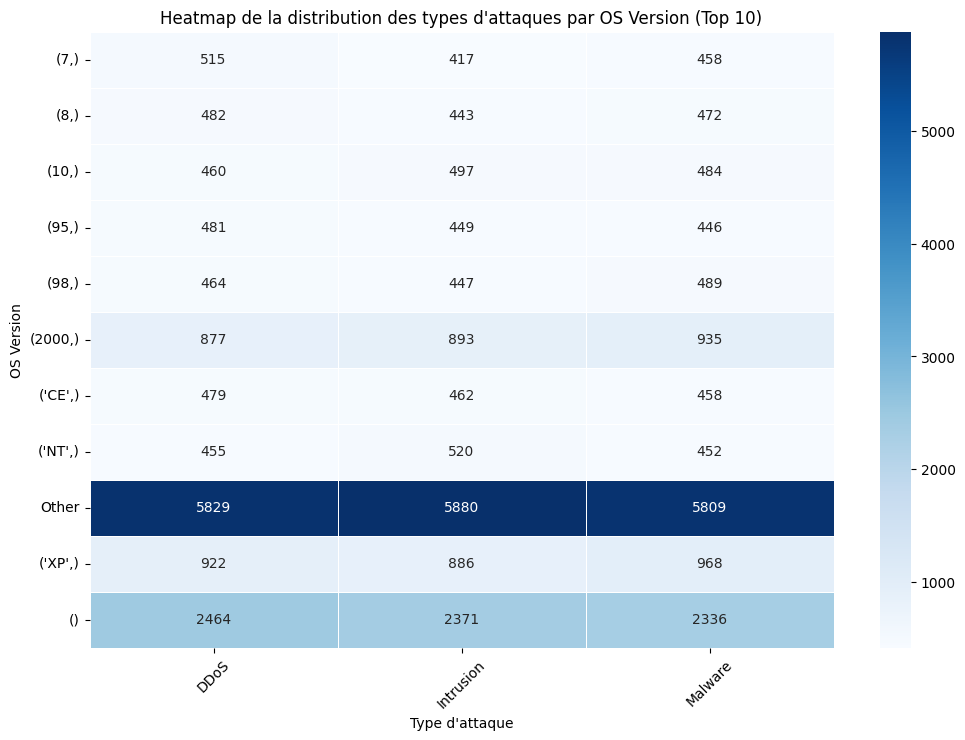

In [68]:
# Compter les occurrences des OS Version
top_10_OS_versions = df['OS Version'].value_counts().head(10).index

df['OS Version Filtered'] = df['OS Version'].apply(lambda x: x if x in top_10_OS_versions else 'Other')

attack_by_browser_version_filtered = pd.crosstab(df['OS Version Filtered'], df['Attack Type'])

plt.figure(figsize=(12,8))
sns.heatmap(attack_by_browser_version_filtered, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title("Heatmap de la distribution des types d'attaques par OS Version (Top 10)")
plt.ylabel("OS Version")
plt.xlabel("Type d'attaque")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Uniform distribution for information taken from the "Device information" column  

We will now try to display the correlation matrix

In [72]:
df = pd.read_csv('cybersecurity_attacks.csv')

In [73]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0),Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0),Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.0),Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; rv:1.9.6.20) Gecko/2583-02-14 13:30:10 Firefox/11.0,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQuia illo fugit eligendi doloremque. In doloremque autem iure.,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/3.0),Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accusantium soluta. Beatae maiores temporibus ratione fuga nostrum. Quas corrupti impedit officiis.,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Adira Madan,"Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac OS X) AppleWebKit/532.0 (KHTML, like Gecko) FxiOS/17.7p9211.0 Mobile/25F435 Safari/532.0",Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commodi.\nAccusantium voluptatum perferendis dolorem nulla ullam sint nisi. Laborum quos quibusdam deserunt quam fuga quas.,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Rati Dara,"Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4.90) AppleWebKit/532.40.6 (KHTML, like Gecko) Version/4.1 Safari/532.40.6",Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligendi tempore esse. Dolorem tenetur ipsam necessitatibus cum minima earum sequi.\nFacere quam ducimus hic. Tempore 

Before applying the correlation matrix: irrelevant columns are removed, missing values are handled, and categorical columns are encoded.

In [75]:
df.drop(columns=['Timestamp','Source IP Address', 'Destination IP Address', 'Source Port','Destination Port', 'Payload Data','User Information','Device Information', 'Geo-location Data','Proxy Information'], inplace=True)

In [77]:
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')
df["Malware Indicators"] = df["Malware Indicators"].fillna("No IoC Detected")
df["Alerts/Warnings"] = df["Alerts/Warnings"].fillna("No Alert Triggered")
df["IDS/IPS Alerts"] = df["IDS/IPS Alerts"].fillna("No Alert Data")

In [78]:
df

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert Triggered,Malware,Known Pattern B,Logged,Low,Segment A,Log Data,No Alert Data,Server
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert Triggered,Malware,Known Pattern A,Blocked,Low,Segment B,Log Data,No Alert Data,Firewall
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall
3,UDP,385,Data,HTTP,No IoC Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B,No Log,Alert Data,Firewall
4,TCP,1462,Data,DNS,No IoC Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,No Log,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,UDP,1428,Control,HTTP,IoC Detected,39.28,No Alert Triggered,DDoS,Known Pattern A,Logged,Medium,Segment A,Log Data,Alert Data,Firewall
39996,UDP,1184,Control,HTTP,IoC Detected,27.25,No Alert Triggered,DDoS,Known Pattern A,Logged,High,Segment C,Log Data,No Alert Data,Firewall
39997,UDP,1043,Data,DNS,IoC Detected,31.01,No Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,Log Data,Alert Data,Server
39998,UDP,483,Data,FTP,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Segment B,Log Data,No Alert Data,Server


In [79]:
df_encoded = pd.get_dummies(df, columns=['Protocol', 'Packet Type','Traffic Type','Malware Indicators','Alerts/Warnings','Attack Type','Attack Signature','Action Taken','Severity Level','Network Segment','Firewall Logs','IDS/IPS Alerts','Log Source'])

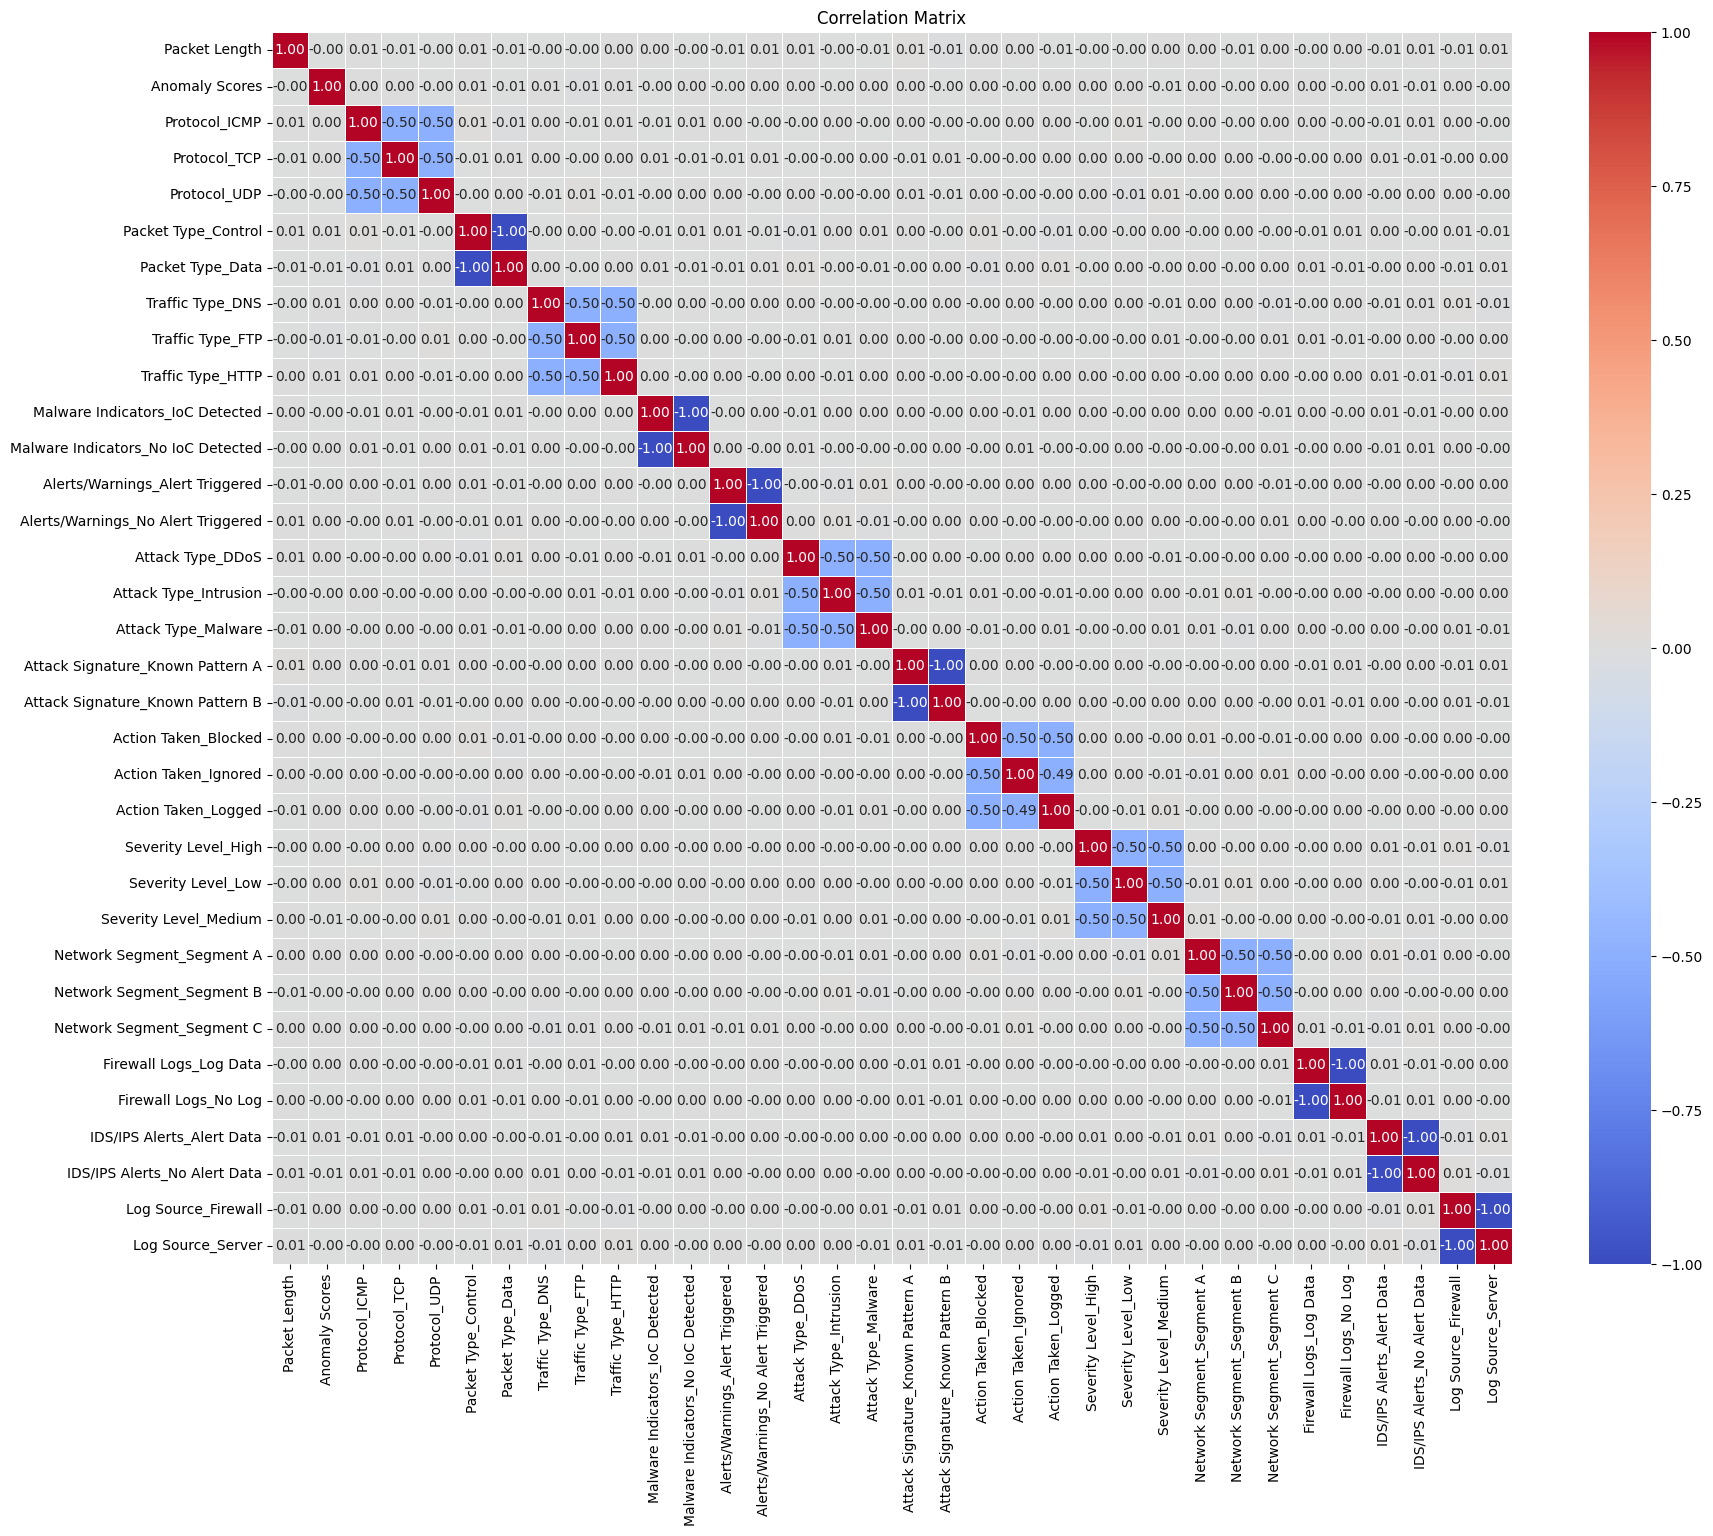

In [80]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



No particular relevant correlation between columns.

We will now try mutual_info_classif. It is an algorithm that allows to select the most relevant features for a classification model

In [89]:
df = pd.read_csv('cybersecurity_attacks.csv')

df.drop(columns=['Timestamp','Source IP Address', 'Destination IP Address', 'Payload Data','User Information','Device Information', 'Geo-location Data','Proxy Information'], inplace=True)

In [90]:
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')
df["Malware Indicators"] = df["Malware Indicators"].fillna("No IoC Detected")
df["Alerts/Warnings"] = df["Alerts/Warnings"].fillna("No Alert Triggered")
df["IDS/IPS Alerts"] = df["IDS/IPS Alerts"].fillna("No Alert Data")

In [91]:
X= df.drop(columns=['Attack Type'])
y = df["Attack Type"]


In [92]:
X_encoded = pd.get_dummies(X, columns=['Protocol', 'Packet Type','Traffic Type','Malware Indicators','Alerts/Warnings','Attack Signature','Action Taken','Severity Level','Network Segment','Firewall Logs','IDS/IPS Alerts','Log Source'])


In [93]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [96]:
X_encoded


,Source Port,Destination Port,Packet Length,Anomaly Scores,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Malware Indicators_IoC Detected,Malware Indicators_No IoC Detected,Alerts/Warnings_Alert Triggered,Alerts/Warnings_No Alert Triggered,Attack Signature_Known Pattern A,Attack Signature_Known Pattern B,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Severity Level_High,Severity Level_Low,Severity Level_Medium,Network Segment_Segment A,Network Segment_Segment B,Network Segment_Segment C,Firewall Logs_Log Data,Firewall Logs_No Log,IDS/IPS Alerts_Alert Data,IDS/IPS Alerts_No Alert Data,Log Source_Firewall,Log Source_Server
0,31225,17616,503,28.67,True,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True
1,17245,48166,1174,51.50,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False
2,16811,53600,306,87.42,False,False,True,True,False,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False
3,20018,32534,385,15.79,False,False,True,False,True,False,False,True,False,True,True,False,False,True,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False
4,6131,26646,1462,0.52,False,True,False,False,True,True,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,1428,39.28,False,False,True,True,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,True,False,True,False
39996,2553,28091,1184,27.25,False,False,True,True,False,False,False,True,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,True,False,False,True,True,False
39997,22505,25152,1043,31.01,False,False,True,False,True,True,False,False,True,False,False,True,False,True,True,False,False,False,True,False,False,False,True,True,False,True,False,False,True
39998,20013,2703,483,97.85,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True


Garde les features avec MI > 0.01 ?

In [95]:
from sklearn.feature_selection import mutual_info_classif

# Calcul de l'information mutuelle
mi_cat = mutual_info_classif(X_encoded, y, discrete_features=True)
print("MI Score pour X catégoriel :", mi_cat)

MI Score pour X catégoriel : [8.51643735e-01 8.55641274e-01 3.62645799e-02 3.02394919e-01
 3.62107050e-07 3.35349302e-06 2.29380067e-06 7.49013971e-05
 7.49013971e-05 9.61624600e-06 2.99932009e-05 1.26817639e-05
 2.02279196e-05 2.02279196e-05 6.91675262e-05 6.91675262e-05
 2.08591698e-05 2.08591698e-05 3.28876685e-05 3.43013173e-08
 3.25525150e-05 6.08627965e-06 5.56364042e-06 2.21175009e-05
 2.92859756e-05 5.10376948e-05 4.80115819e-06 8.03627876e-06
 8.03627876e-06 6.34169617e-06 6.34169617e-06 1.55585204e-05
 1.55585204e-05]


C:\Users\natha\miniconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


According to the algorithm, we can keep the columns: Source Port (0.85)
Destination Port (0.85)
Anomaly Scores (0.30)

But we saw in the previous analyses that each of these columns had a uniform distribution and are not relevant for attack type prediction



## Feature Engineering and Selection

In [2]:
df = pd.read_csv('cybersecurity_attacks.csv')

### Handling missing values

In [4]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

For Malware Indicators, Alerts/Warnings , IDS/IPS Alerts, Proxy Information, Firewall Logs replace NaN values by 'No IoC Detected', 'No Alert Triggered', 'No Alert Data' etc.. 

In [3]:
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')
df['Proxy Information'] = df['Proxy Information'].fillna('No Proxy')

df["Malware Indicators"] = df["Malware Indicators"].fillna("No IoC Detected")
df["Alerts/Warnings"] = df["Alerts/Warnings"].fillna("No Alert Triggered")
df["IDS/IPS Alerts"] = df["IDS/IPS Alerts"].fillna("No Alert Data")


In [6]:
df.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

### Removal of Irrelevant Columns

In [4]:
df.drop(columns=['Source IP Address', 'Destination IP Address', 'Source Port','Destination Port', 'Payload Data','User Information','Proxy Information'], inplace=True)


### Parse the "Timestamp" column  


In [5]:
#We extract the day, month and year for each observation then we delete the "Timestamp" column

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Year'] = df['Timestamp'].dt.year

df.drop(columns=['Timestamp'], inplace=True)


### Parse the "Device Information" column

In [6]:

def parse_user_agent(user_agent):
    ua = parse(user_agent)
    
    os_family = ua.os.family
    os_version = ua.os.version
    device_family = ua.device.family
    device_brand = ua.device.brand if ua.device.brand else "Unknown"
    device_model = ua.device.model if ua.device.model else "Unknown"
    browser_family = ua.browser.family
    
    return os_family, os_version, device_family, device_brand, device_model, browser_family

df[['Operating System', 'OS Version', 'Device', 'Device Brand', 'Device Model', 'Browser']] = df['Device Information'].apply(lambda x: pd.Series(parse_user_agent(x)))

df.drop(columns=['Device Information'], inplace=True)


### Parse the "Geo-location Data" column

In [7]:
df['State'] = df['Geo-location Data'].str.split(',').str[1].str.strip()

df.drop(columns=['Geo-location Data'], inplace=True)

We will now encode the categorical columns and split our data into training and test data. Then we will test the RFE algorithm

In [8]:

# Appliquer One-Hot Encoding sur les colonnes catégoriques
df_encoded = pd.get_dummies(df, columns=['Protocol', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Month', 'Day', 'Operating System', 'OS Version', 'Device',
       'Device Brand', 'Device Model', 'Browser', 'State'])





In [9]:
df_encoded_without_labels = df_encoded.drop(columns=['Attack Type'])





In [10]:
X = df_encoded_without_labels
y= df['Attack Type']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 




In [11]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    
# Sauvegarder les colonnes après One-Hot Encoding
columns_train = X.columns

# Sauvegarder dans un fichier pour une utilisation future

with open("columns_train.pkl", "wb") as f:
    pickle.dump(columns_train, f)


In [12]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


We will try RFE  

RFE is an algorithm for selecting the most relevant features for a model while eliminating non-significant features.   

We will test the RFE on 3 different models: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression

In [15]:
#Initialiser les modèles à tester

model = DecisionTreeClassifier(random_state=42)

model2 = RandomForestClassifier(n_estimators=100, random_state=42)

model3 = LogisticRegression(solver='liblinear')



In [16]:
##DecisionTreeClassifier##


# Appliquer RFE pour la sélection des caractéristiques
rfe = RFE(model, n_features_to_select=20)  # Sélectionner les 20 meilleures caractéristiques
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Afficher les caractéristiques sélectionnées par RFE
selected_features = X.columns[rfe.support_]
print("Caractéristiques sélectionnées par RFE :")
print(selected_features)



Caractéristiques sélectionnées par RFE :
Index(['Packet Length', 'Anomaly Scores', 'Year', 'Protocol_TCP',
       'Protocol_UDP', 'Packet Type_Control', 'Traffic Type_DNS',
       'Traffic Type_FTP', 'Attack Signature_Known Pattern B',
       'Action Taken_Ignored', 'Action Taken_Logged', 'Severity Level_High',
       'Severity Level_Low', 'Severity Level_Medium',
       'Network Segment_Segment C', 'Firewall Logs_No Log',
       'IDS/IPS Alerts_No Alert Data', 'Log Source_Server',
       'Operating System_Windows', 'Device Brand_Apple'],
      dtype='object')


In [17]:
# Entraîner le modèle avec les caractéristiques sélectionnées
model.fit(X_train_rfe, y_train)

# Transformer les données de test avec les mêmes caractéristiques sélectionnées
X_test_rfe = rfe.transform(X_test)

# Prédictions
y_pred = model.predict(X_test_rfe)

    
# Afficher le rapport de classification
print(classification_report(y_test, y_pred,  target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        DDoS       0.32      0.33      0.33      3996
   Intrusion       0.34      0.33      0.33      4048
     Malware       0.33      0.33      0.33      3956

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000



In [18]:
##RandomForestClassifier##

# Appliquer RFE pour la sélection des caractéristiques
rfe2 = RFE(model2, n_features_to_select=20)  # Sélectionner les 20 meilleures caractéristiques
X_train_rfe2 = rfe2.fit_transform(X_train, y_train)

# Afficher les caractéristiques sélectionnées par RFE
selected_features2 = X.columns[rfe2.support_]
print("Caractéristiques sélectionnées par RFE :")
print(selected_features2)


Caractéristiques sélectionnées par RFE :
Index(['Packet Length', 'Anomaly Scores', 'Year', 'Protocol_ICMP',
       'Packet Type_Data', 'Traffic Type_FTP',
       'Malware Indicators_No IoC Detected', 'Alerts/Warnings_Alert Triggered',
       'Attack Signature_Known Pattern B', 'Action Taken_Ignored',
       'Action Taken_Logged', 'Severity Level_Low', 'Severity Level_Medium',
       'Network Segment_Segment A', 'Network Segment_Segment C',
       'Firewall Logs_Log Data', 'IDS/IPS Alerts_No Alert Data',
       'Log Source_Firewall', 'Operating System_Windows',
       'Device Model_Unknown'],
      dtype='object')


In [19]:

# Entraîner le modèle avec les caractéristiques sélectionnées
model2.fit(X_train_rfe2, y_train)

# Transformer les données de test avec les mêmes caractéristiques sélectionnées
X_test_rfe2 = rfe2.transform(X_test)

# Prédictions
y_pred = model2.predict(X_test_rfe)

    
# Afficher le rapport de classification
print(classification_report(y_test, y_pred,  target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        DDoS       0.33      0.35      0.34      3996
   Intrusion       0.35      0.34      0.35      4048
     Malware       0.32      0.31      0.32      3956

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000



In [20]:
## LogisticRegression ##

# Appliquer RFE pour la sélection des caractéristiques
rfe3 = RFE(model3, n_features_to_select=20)  # Sélectionner les 20 meilleures caractéristiques
X_train_rfe3 = rfe3.fit_transform(X_train, y_train)

In [21]:


# Afficher les caractéristiques sélectionnées par RFE
selected_features3 = X.columns[rfe3.support_]
print("Caractéristiques sélectionnées par RFE :")
print(selected_features3)


Caractéristiques sélectionnées par RFE :
Index(['OS Version_(2, 0)', 'OS Version_(2, 1)', 'OS Version_(2, 2, 3)',
       'OS Version_(2, 2)', 'OS Version_(2, 3, 5)', 'OS Version_(2, 3, 7)',
       'OS Version_(3, 2, 2)', 'OS Version_(3, 2, 3)', 'OS Version_(4, 0, 3)',
       'OS Version_(4, 0, 4)', 'OS Version_(4, 4, 4)', 'OS Version_(5, 0)',
       'OS Version_(6, 0, 1)', 'OS Version_(9,)', 'OS Version_(10, 5, 4)',
       'OS Version_(10, 8, 5)', 'OS Version_(10, 8, 8)',
       'OS Version_(10, 9, 3)', 'OS Version_(10, 10, 4)', 'Device_LG UG'],
      dtype='object')


In [22]:
# Entraîner le modèle avec les caractéristiques sélectionnées
model3.fit(X_train_rfe3, y_train)

# Transformer les données de test avec les mêmes caractéristiques sélectionnées
X_test_rfe = rfe3.transform(X_test)

# Prédictions
y_pred = model3.predict(X_test_rfe)

    
# Afficher le rapport de classification
print(classification_report(y_test, y_pred,  target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        DDoS       0.33      0.98      0.50      3996
   Intrusion       0.31      0.01      0.02      4048
     Malware       0.31      0.01      0.01      3956

    accuracy                           0.33     12000
   macro avg       0.32      0.33      0.18     12000
weighted avg       0.32      0.33      0.18     12000



The features selected by the RFE randomly predict each of the 3 attacks (precision of 0.34). It allows us to reduce the number of features given to our models (from 300 to 20 features). Let's compare these results with training the models without feature selection. (So we will provide all 300 columns to our model)

## Model Selection, Comparison and Evaluation

Models we will test: Decision Tree, Random Forest, Logistic Regression

In [23]:
def train_and_evaluate(model, model_name):
    print(f"\n🔹 Évaluation du modèle : {model_name}")
    
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # Rapport de classification
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies valeurs")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()



🔹 Évaluation du modèle : Decision Tree
Accuracy: 0.3341

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.34      0.34      0.34      3996
   Intrusion       0.33      0.32      0.33      4048
     Malware       0.34      0.34      0.34      3956

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000



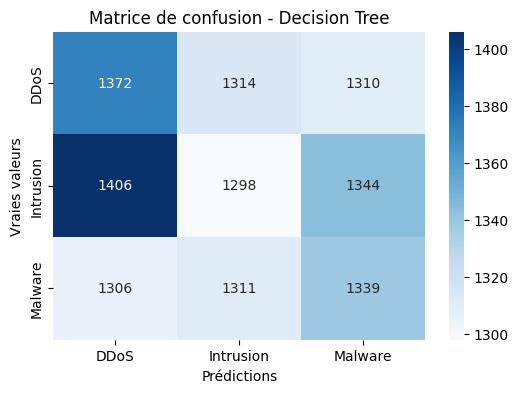


🔹 Évaluation du modèle : Random Forest
Accuracy: 0.3327

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.33      0.37      0.35      3996
   Intrusion       0.33      0.30      0.32      4048
     Malware       0.33      0.32      0.33      3956

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000



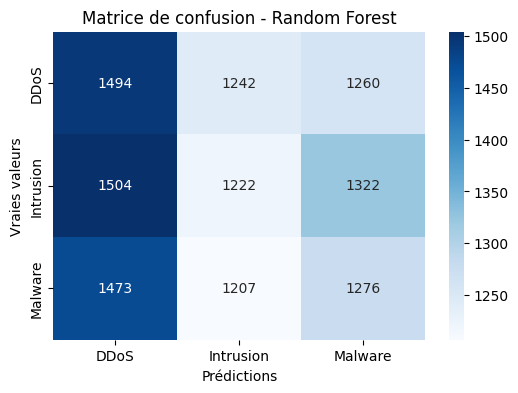


🔹 Évaluation du modèle : Logistic Regression
Accuracy: 0.3361

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.33      0.55      0.42      3996
   Intrusion       0.00      0.00      0.00      4048
     Malware       0.34      0.46      0.39      3956

    accuracy                           0.34     12000
   macro avg       0.22      0.34      0.27     12000
weighted avg       0.22      0.34      0.27     12000



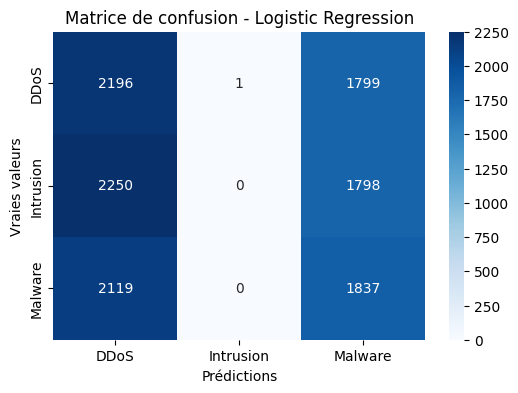

In [24]:
# Modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_model, "Decision Tree")

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, "Random Forest")


# Modèle Logistic Regression
lr_model =  LogisticRegression(solver='liblinear')
train_and_evaluate(lr_model, "Logistic Regression")


Finally, for our application, we will keep the Decision Tree model without RFE because it is the one that gives us better results

In [25]:
#Save selected model

with open('DecisionTree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)